<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/NorthDakota/maxPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 8)
uploaded = files.upload()

In [ ]:
data = pd.read_excel('ND_BakkenPublic.xlsx')
data.tail(3)

,API14,Pool,feDate,maxPo,maxPg,MHB,LL,APINumber,JobEndDate,WaterGal,SandLB
3845,33105060510000,BAKKEN,2024-03-01,450.310345,1318.413793,DN88ln,10717.311777,33105060510000,2023-11-02,7912265.0,10115174.70
3846,33105060520000,BAKKEN,2024-03-01,314.290323,875.387097,DN88ln,10730.701064,33105060520000,2023-11-02,7987943.0,10114924.95
3847,33105061140000,BAKKEN,2024-02-01,963.206897,1421.310345,DN88oh,9899.942026,33105061140000,2023-12-22,8083362.0,9652284.00


In [ ]:
data['year'] = data['feDate'].dt.year   #.str[:4]
data['Gas'] = data.maxPg/6
data['Oil'] = data.maxPo

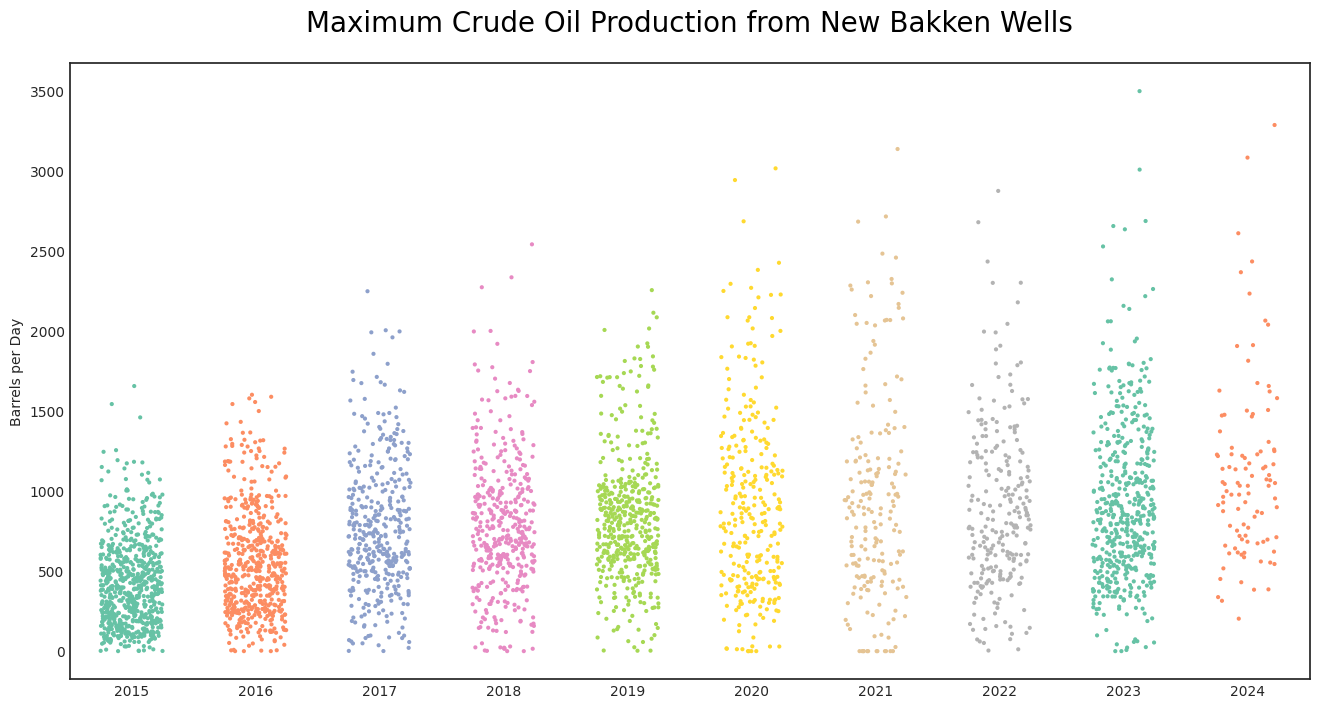

In [ ]:
plt.title('Maximum Crude Oil Production from New Bakken Wells', pad=23, color='black', size=20)
sns.stripplot(x="year", y="maxPo", data=data, size=3, hue='year',legend=False, palette='Set2',
              jitter=0.25).set(xlabel=None, ylabel='Barrels per Day');

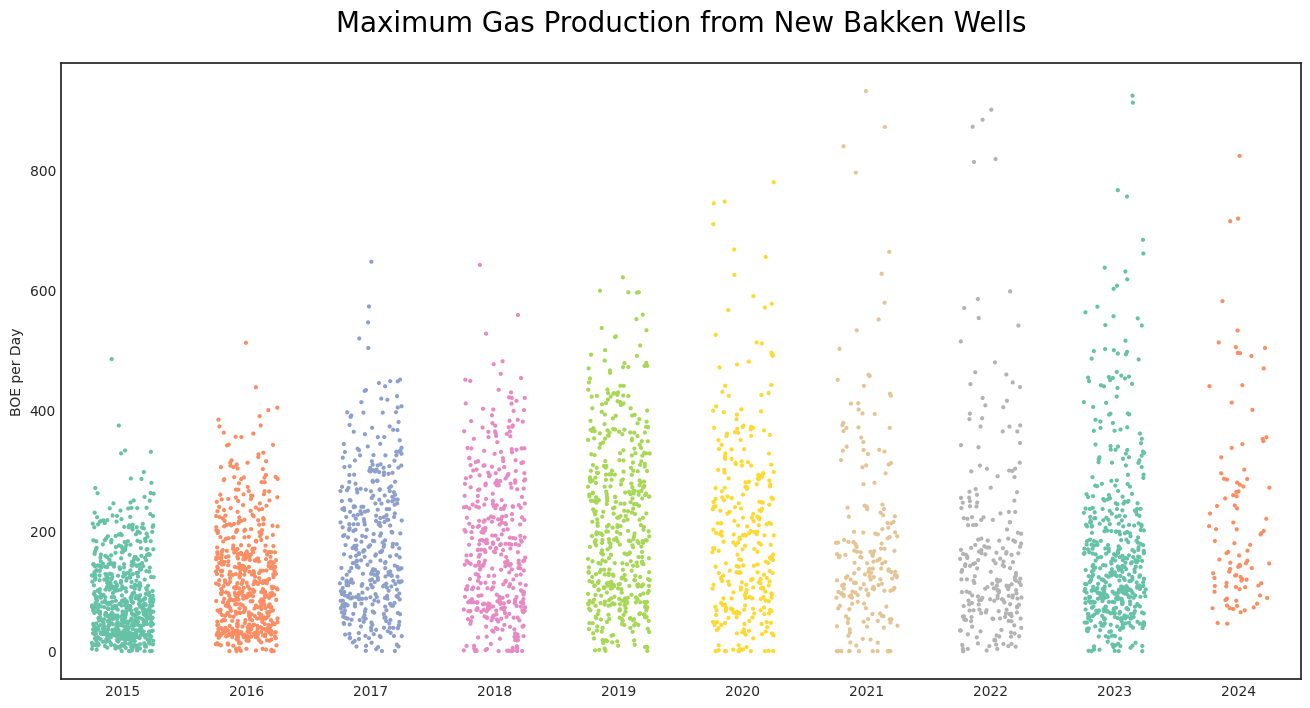

In [ ]:
plt.title('Maximum Gas Production from New Bakken Wells', pad=23, color='black', size=20)
sns.stripplot(x="year", y="Gas", data=data, size=3,hue='year',legend=False, palette='Set2',
              jitter=0.25).set(xlabel=None, ylabel='BOE per Day');

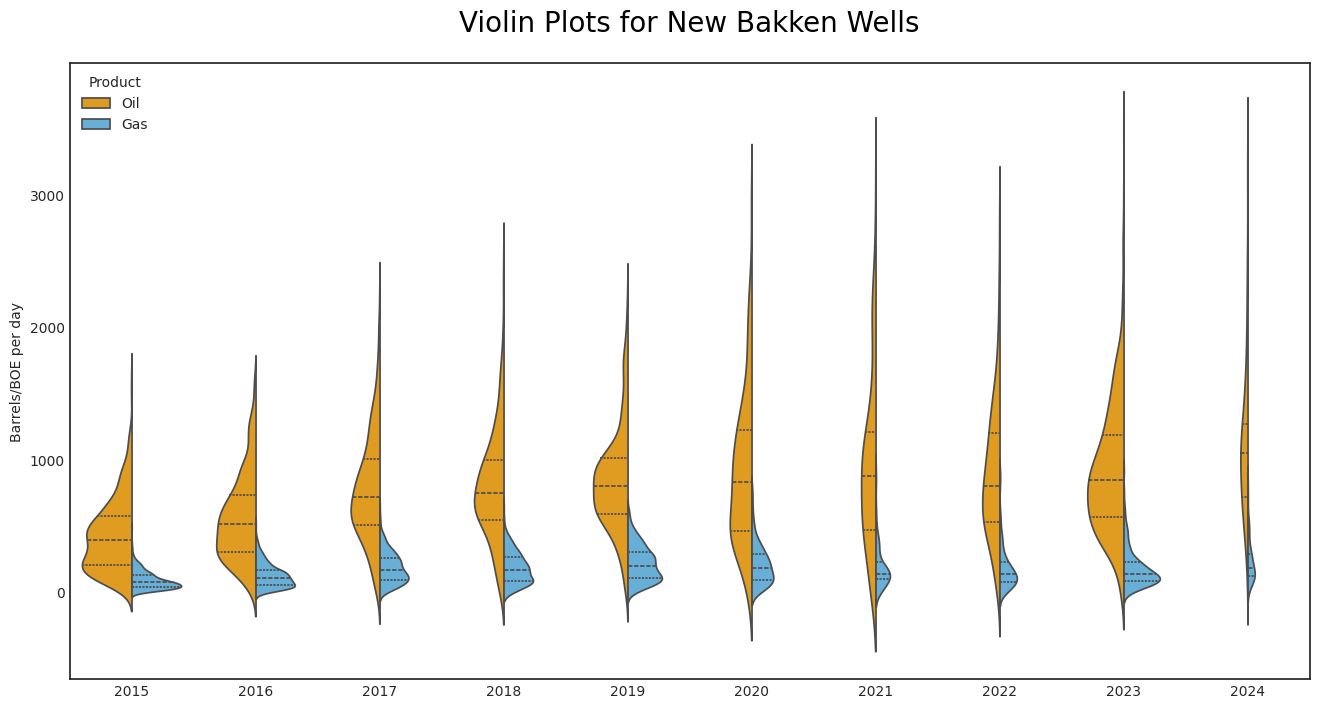

In [ ]:
dfVh = data[['Oil', 'Gas','year']]
dfVmh = dfVh.melt(id_vars='year' ,var_name='Product', value_name='BOE_Flow')
plt.title('Violin Plots for New Bakken Wells', pad=23, color='black', size=20)
jlcolour = {"Gas": "C5", "Oil": "orange"}
sns.violinplot(x="year", y='BOE_Flow', hue='Product', data=dfVmh, split=True, inner='quartile',
    density_norm='count', palette=jlcolour).set(xlabel=None, ylabel='Barrels/BOE per day')
plt.legend(loc='upper left',title='Product');

In [3]:
uploaded2 = files.upload()

Saving NDMWD.csv to NDMWD.csv


In [5]:
NDMWD = pd.read_csv('NDMWD.csv')
NDMWD.tail(3)

,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,County,...,Pool,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long
1975903,2024-07-01,33009012640000,6347,EMPIRE NORTH DAKOTA LLC,RICE 2,SENW,26.0,163.0,79.0,BOT,...,SPEARFISH/MADISON,0.0,0.0,0.0,0,0.0,0,0.0,48.917191,-100.876462
1975904,2024-07-01,33009011910000,5815,EMPIRE NORTH DAKOTA LLC,RICE 23-12,NWSW,23.0,163.0,79.0,BOT,...,SPEARFISH/MADISON,60.0,0.0,29.0,31,0.0,0,0.0,48.928322,-100.881995
1975905,2024-07-01,33009019570000,13685,EMPIRE NORTH DAKOTA LLC,RICE 3,NENW,26.0,163.0,79.0,BOT,...,SPEARFISH/MADISON,143.0,0.0,29.0,103,0.0,0,0.0,48.920808,-100.877109


In [6]:
NDMWD.drop_duplicates(inplace=True)
NDMWD = NDMWD[NDMWD['Days'] >= 25].reset_index(drop=True)
NDMWD['ReportDate'] = pd.to_datetime(NDMWD['ReportDate'], errors = 'coerce')
NDMWD.tail(2)

,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,County,...,Pool,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long
1440514,2024-07-01,33009011910000,5815,EMPIRE NORTH DAKOTA LLC,RICE 23-12,NWSW,23.0,163.0,79.0,BOT,...,SPEARFISH/MADISON,60.0,0.0,29.0,31,0.0,0,0.0,48.928322,-100.881995
1440515,2024-07-01,33009019570000,13685,EMPIRE NORTH DAKOTA LLC,RICE 3,NENW,26.0,163.0,79.0,BOT,...,SPEARFISH/MADISON,143.0,0.0,29.0,103,0.0,0,0.0,48.920808,-100.877109


In [7]:
ffmWells = NDMWD[['API_WELLNO', 'Pool','ReportDate']].groupby('API_WELLNO').min().rename(columns={'ReportDate':'ffMonth'}).reset_index()
ffmWells.tail(3)

,API_WELLNO,Pool,ffMonth
21570,33105061290000,BAKKEN,2024-07-01
21571,33105061300000,BAKKEN,2024-07-01
21572,33105903870000,DAKOTA,2018-01-01


In [8]:
ffmWells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21573 entries, 0 to 21572
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  21573 non-null  int64         
 1   Pool        21573 non-null  object        
 2   ffMonth     21573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.7+ KB


In [9]:
ffmWells = ffmWells.merge(NDMWD[['API_WELLNO','Pool','ReportDate','Oil','Gas','Wtr','Days','Runs', 'Lat', 'Long']], how='left', left_on=['API_WELLNO','Pool','ffMonth'], right_on = ['API_WELLNO','Pool','ReportDate'])
ffmWells.dropna(inplace=True)
ffmWells.reset_index(drop=True)
ffmWells.tail()

,API_WELLNO,Pool,ffMonth,ReportDate,Oil,Gas,Wtr,Days,Runs,Lat,Long
21568,33105061220000,BAKKEN,2024-05-01,2024-05-01,7983.0,12315.0,15524.0,30.0,7907.0,48.340799,-103.075445
21569,33105061230000,BAKKEN,2024-05-01,2024-05-01,7290.0,11456.0,12890.0,29.0,7221.0,48.340799,-103.075260
21570,33105061290000,BAKKEN,2024-07-01,2024-07-01,17513.0,49910.0,17888.0,31.0,17530.0,48.281831,-103.014284
21571,33105061300000,BAKKEN,2024-07-01,2024-07-01,17754.0,67166.0,18273.0,31.0,17775.0,48.281831,-103.014148
21572,33105903870000,DAKOTA,2018-01-01,2018-01-01,410.0,0.0,0.0,31.0,946.0,48.404169,-103.475385


In [10]:
ffmWells.drop('ReportDate', axis=1, inplace=True )
ffmWells['bpd'] =  ffmWells.Oil/ffmWells.Days
ffmWells['Mcfpd'] =  ffmWells.Gas/ffmWells.Days

In [11]:
ffmWells.tail()

,API_WELLNO,Pool,ffMonth,Oil,Gas,Wtr,Days,Runs,Lat,Long,bpd,Mcfpd
21568,33105061220000,BAKKEN,2024-05-01,7983.0,12315.0,15524.0,30.0,7907.0,48.340799,-103.075445,266.100000,410.500000
21569,33105061230000,BAKKEN,2024-05-01,7290.0,11456.0,12890.0,29.0,7221.0,48.340799,-103.075260,251.379310,395.034483
21570,33105061290000,BAKKEN,2024-07-01,17513.0,49910.0,17888.0,31.0,17530.0,48.281831,-103.014284,564.935484,1610.000000
21571,33105061300000,BAKKEN,2024-07-01,17754.0,67166.0,18273.0,31.0,17775.0,48.281831,-103.014148,572.709677,2166.645161
21572,33105903870000,DAKOTA,2018-01-01,410.0,0.0,0.0,31.0,946.0,48.404169,-103.475385,13.225806,0.000000


In [ ]:
ffmWells.info()

In [24]:
data = ffmWells[['API_WELLNO','Pool','ffMonth','bpd','Mcfpd']][data['Pool'] == 'BAKKEN'].copy()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17916 entries, 115 to 21571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  17916 non-null  int64         
 1   Pool        17916 non-null  object        
 2   ffMonth     17916 non-null  datetime64[ns]
 3   bpd         17916 non-null  float64       
 4   Mcfpd       17916 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 839.8+ KB


In [26]:
data['year'] = data['ffMonth'].dt.year   #.str[:4]
data['Gas'] = data.Mcfpd/6
data['Oil'] = data.bpd

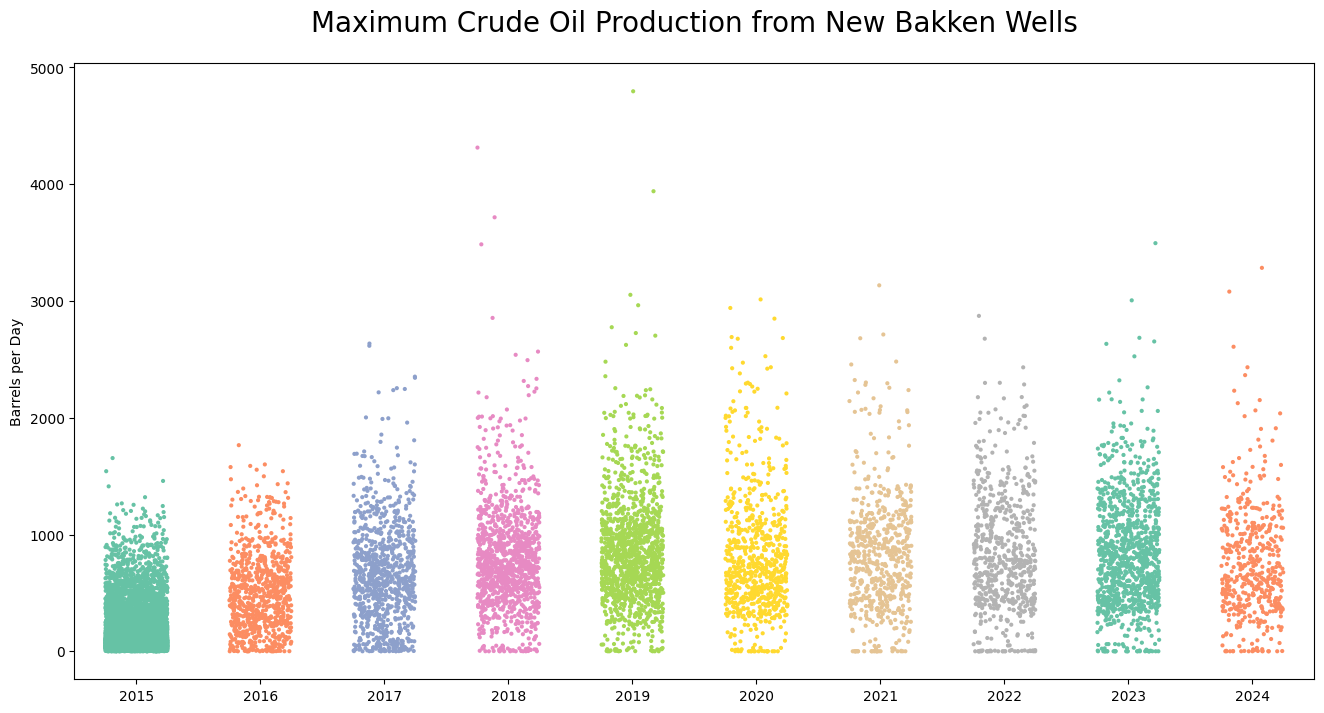

In [27]:
plt.title('Maximum Crude Oil Production from New Bakken Wells', pad=23, color='black', size=20)
sns.stripplot(x="year", y="Oil", data=data, size=3, hue='year',legend=False, palette='Set2',
              jitter=0.25).set(xlabel=None, ylabel='Barrels per Day');

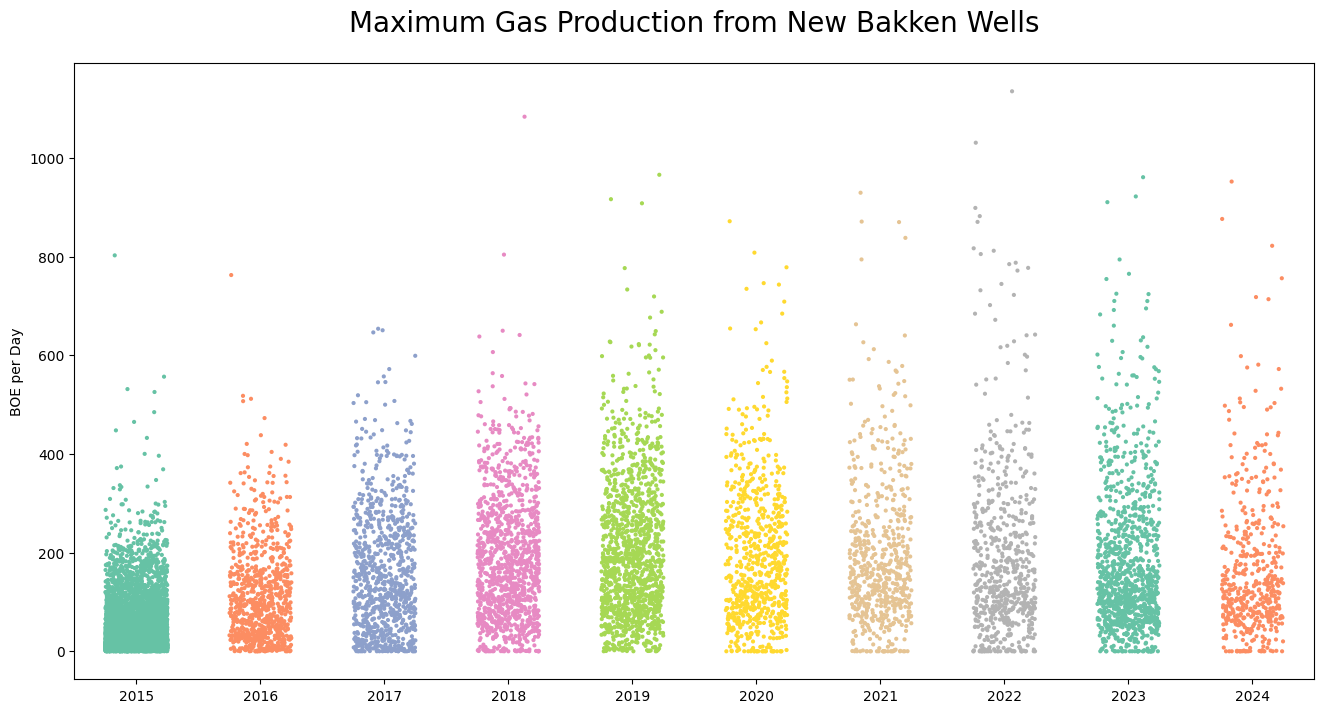

In [28]:
plt.title('Maximum Gas Production from New Bakken Wells', pad=23, color='black', size=20)
sns.stripplot(x="year", y="Gas", data=data, size=3,hue='year',legend=False, palette='Set2',
              jitter=0.25).set(xlabel=None, ylabel='BOE per Day');

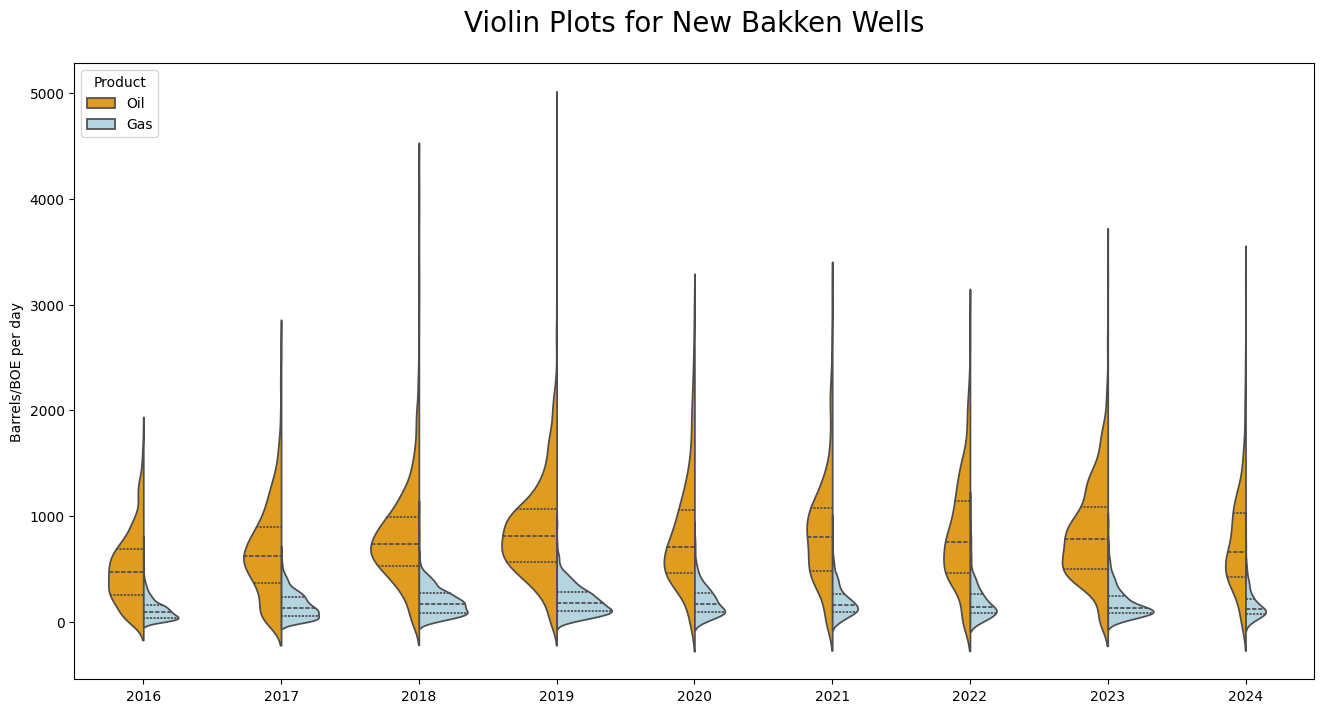

In [29]:
dfVh = data[['Oil', 'Gas','year']][data['year'] > 2015]
dfVmh = dfVh.melt(id_vars='year' ,var_name='Product', value_name='BOE_Flow')
plt.title('Violin Plots for New Bakken Wells', pad=23, color='black', size=20)
jlcolour = {"Gas": "lightblue", "Oil": "orange"}
sns.violinplot(x="year", y='BOE_Flow', hue='Product', data=dfVmh, split=True, inner='quartile',
    density_norm='count', palette=jlcolour).set(xlabel=None, ylabel='Barrels/BOE per day')
plt.legend(loc='upper left',title='Product');

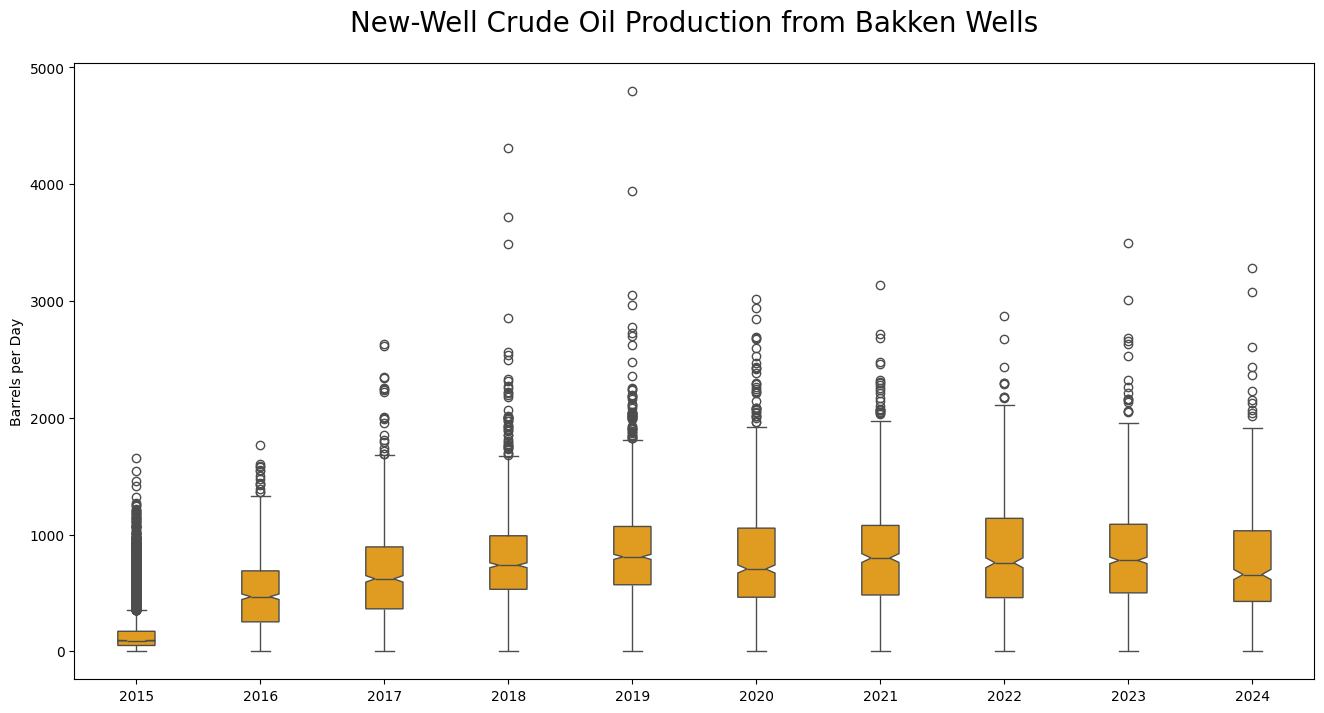

In [40]:
plt.title('New-Well Crude Oil Production from Bakken Wells', pad=23, color='Black', size=20)
sns.boxplot(x=data["year"], y=data["Oil"], color='orange', width=0.3,
            notch=True).set(xlabel=None, ylabel='Barrels per Day');

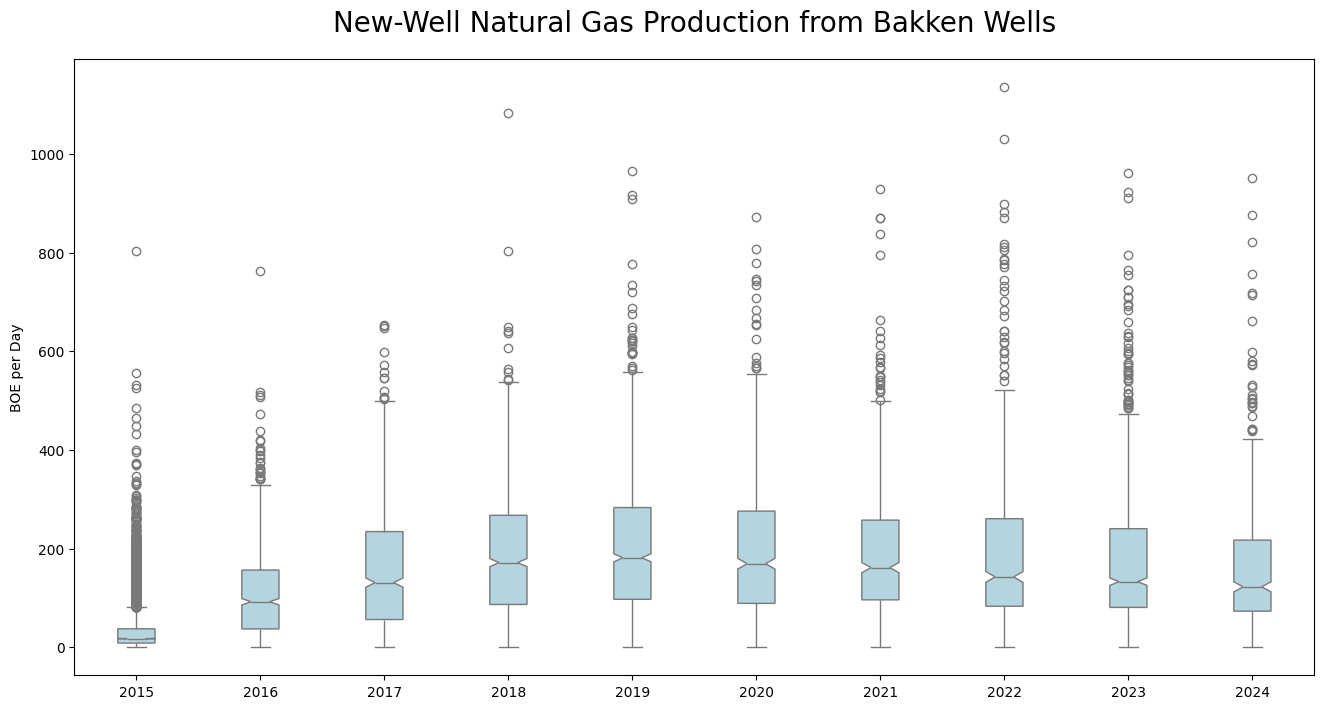

In [41]:
plt.title('New-Well Natural Gas Production from Bakken Wells', pad=20, color='black', size=20)
sns.boxplot(x=data["year"], y=data["Gas"], color='lightblue', width=0.3,
            notch=True).set(xlabel= None, ylabel='BOE per Day');